In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Binarizer, LabelEncoder, MaxAbsScaler, MinMaxScaler, OneHotEncoder, \
    OrdinalEncoder, RobustScaler, StandardScaler

# Exercise 2 - Debugging - Drugs

The dataset contains a set of patients, all of whom suffered from the same illness.
During their course of treatment, each patient responded to one of 5 medications: Drug A, Drug B, Drug c, Drug x or y.

This complex dataset proposes a set of challenges that you'll try to overcome. A basic ML pipeline is already in place. You have to optimize the performance of the model by applying good practices, debugging pre-processing errors, etc.

**Rules**:
- Do not use other modules than those already imported *(or do it only if your own code is not working. In this case, keep your own code in the notebook, commented, so that we know what you tried)*.
- Explain **all** of your choices. For every task, choose the most appropriate option for this problem and describe your choice.
- You can modify any parts of the code or replace the model by one already used in previous PWs.

**Work to do**:
- [x] Apply a type of normalization.
- [x] Encode categorical data.
- [x] Use all columns in the dataset (or choose the most meaningful features).
- [x] Choose a more appropriate metric.
- [x] Optimize hyper-parameters.
- [x] Test the model performance correctly using a separated test set.
- Apply **two** of those techniques:
  - [x] Keep relative class frequencies in the train/test sets (check train_test_split docs)
  - [x] Show which feature(s) are the most correlated to the target.
  - [ ] Use cross-validation.

In [2]:
df = pd.read_csv("drug.csv")
df.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
categorical_columns = ["sex", "bp", "cholesterol", "drug"]

#Pour chacune de ces catégories, le nombre de possibilté étant fini, on fait un encodage par label.
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
    
#normalisation des colonnes à nombre de classe fixe    
df[["bp", "cholesterol"]] = MinMaxScaler().fit_transform(df[["bp", "cholesterol"]])

In [5]:
df.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,0,0.0,0.0,25.355,4
1,47,1,0.5,0.0,13.093,2
2,47,1,0.5,0.0,10.114,2
3,28,0,1.0,0.0,7.798,3
4,61,0,0.5,0.0,18.043,4


In [6]:
X = df.drop(columns="drug")
y = df["drug"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#setting stratify to yes permits to keep relative class frequencies

In [8]:
#normalisation des colonnes restante   
X_train[["age", "Na_to_K"]] = RobustScaler().fit_transform(X_train[["age", "Na_to_K"]])
X_test[["age", "Na_to_K"]] = RobustScaler().fit_transform(X_test[["age", "Na_to_K"]])

#tout float
X_train[['age', 'sex']] = X_train[['age', 'sex']].astype(float)
X_test[['age', 'sex']] = X_test[['age', 'sex']].astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

/Users/jojoc4/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/jojoc4/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/jojoc4/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [9]:
X_train.head()

,age,sex,bp,cholesterol,Na_to_K
196,-1.026549,1.0,0.5,0.0,-0.215534
134,-0.106195,0.0,0.0,0.0,0.807203
24,-0.424779,0.0,0.5,0.0,2.217289
2,0.070796,1.0,0.5,0.0,-0.429821
97,0.389381,0.0,0.0,0.0,1.300903


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 196 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          160 non-null    float64
 1   sex          160 non-null    float64
 2   bp           160 non-null    float64
 3   cholesterol  160 non-null    float64
 4   Na_to_K      160 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


In [11]:
#searching best k
best=0
best_acc=0
for k in range(1, 150):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = metrics.balanced_accuracy_score(y_test, y_pred)
    if(best_acc<acc):
        best=k
        best_acc=acc

In [12]:
knn = KNeighborsClassifier(best)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
def predict(estimator, X, y):
    # predict
    y_pred = knn.predict(X)
    
    # show confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot();
    
    # check metric (this one is probably not the best choice...)
    #Le dataset parraissant déséquilibré, il est judicieux d'utiliser balanced_accuracy_score
    metric = metrics.balanced_accuracy_score(y, y_pred)
    print(f"Accuracy: {metric}")

Accuracy: 0.9307070707070707


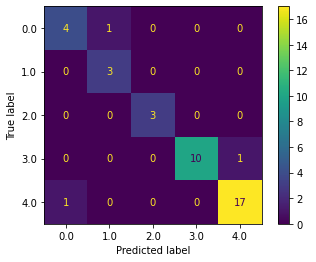

In [14]:
predict(knn, X_test, y_test)

In [15]:
#montre la corrélation entre les features et les target.
#on peut voir que la feature la plus influente est Na_to_K suivit de bp
df[df.columns[:]].corr()['drug'][:]

age           -0.004828
sex           -0.098573
bp             0.372868
cholesterol    0.055629
Na_to_K        0.589120
drug           1.000000
Name: drug, dtype: float64